In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
 
import os
import random
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'
 
%matplotlib inline

In [ ]:
###Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
###Printing the shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
###Normalization of the data
x_train, x_test = x_train.reshape(-1, 28,28,1).astype("float32") / 255.0, x_test.reshape(-1, 28,28,1).astype("float32")  / 255.0

In [ ]:
###Making the model for this dataset
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),

    layers.Conv2D(filters=256, kernel_size=(5,5), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 256)       6656      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                204864    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [ ]:
###For loss function 'adam' 
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
h1 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=256, validation_split=0.2)

Epoch 1/5
188/188 [==============================] - 262s 1s/step - loss: 0.2616 - accuracy: 0.9188 - val_loss: 0.0728 - val_accuracy: 0.9776
Epoch 2/5
188/188 [==============================] - 261s 1s/step - loss: 0.0585 - accuracy: 0.9818 - val_loss: 0.0491 - val_accuracy: 0.9859
Epoch 3/5
188/188 [==============================] - 260s 1s/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0544 - val_accuracy: 0.9836
Epoch 4/5
188/188 [==============================] - 260s 1s/step - loss: 0.0305 - accuracy: 0.9907 - val_loss: 0.0417 - val_accuracy: 0.9877
Epoch 5/5
188/188 [==============================] - 260s 1s/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0409 - val_accuracy: 0.9877


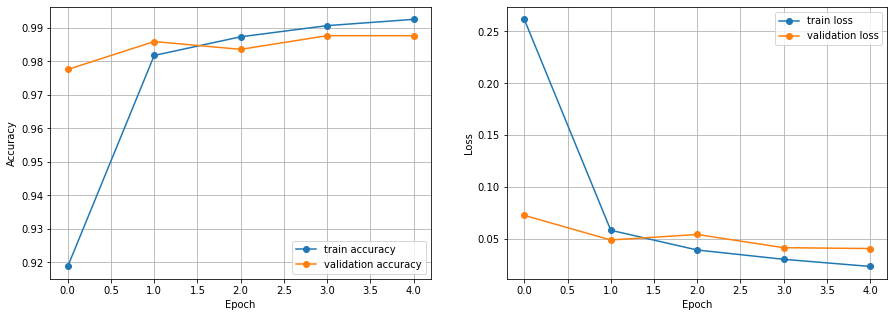

In [ ]:
###Plotting graph for loss function 'adam'
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
###Predcting accrucy for 'adam'
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)



313/313 [==============================] - 14s 43ms/step - loss: 0.0321 - accuracy: 0.9894

Test Accuracy: 0.9894000291824341

Test Loss: 0.032134849578142166


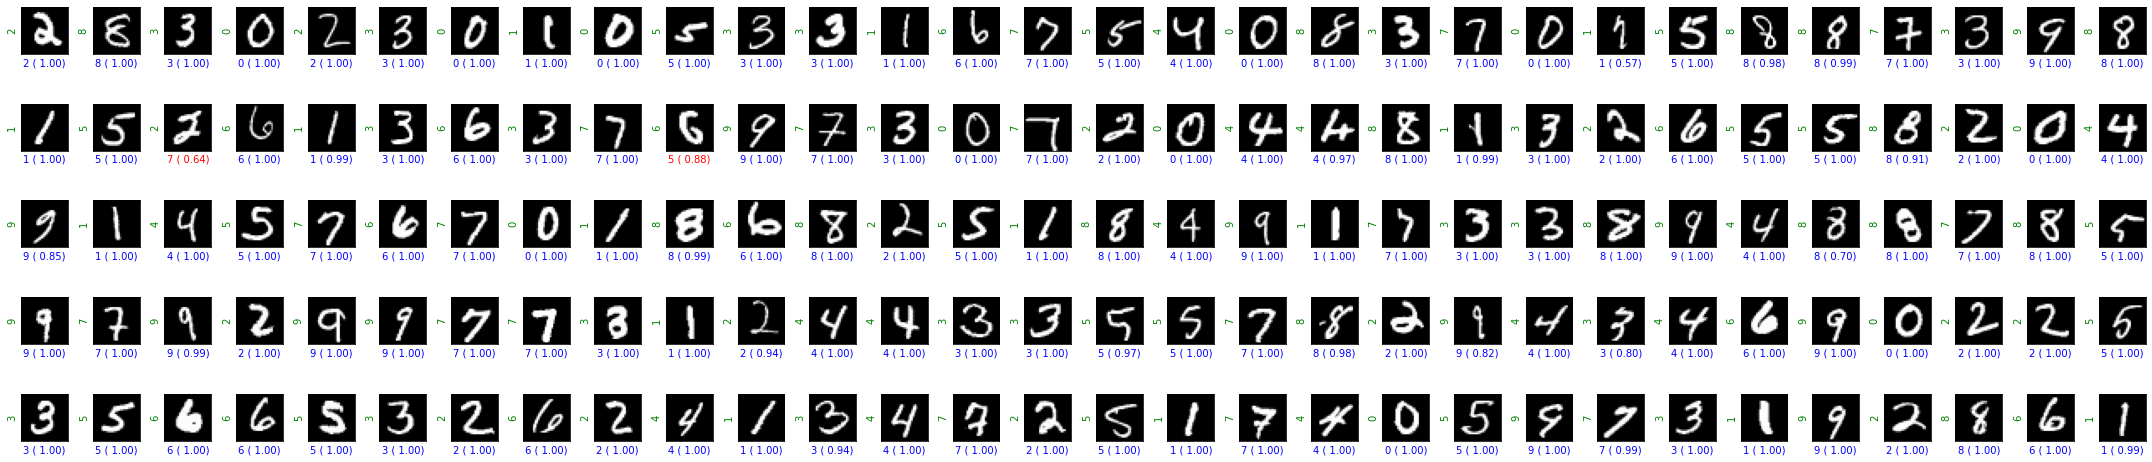

In [ ]:
###Predicting Images for loss function 'adam'

ROWS = 5
COLS = 30

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [ ]:
###For loss function  'sgd'

model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
h2 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=256, validation_split=0.2)

Epoch 1/5
188/188 [==============================] - 263s 1s/step - loss: 0.0138 - accuracy: 0.9962 - val_loss: 0.0320 - val_accuracy: 0.9904
Epoch 2/5
188/188 [==============================] - 262s 1s/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.0314 - val_accuracy: 0.9906
Epoch 3/5
188/188 [==============================] - 263s 1s/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 0.0311 - val_accuracy: 0.9908
Epoch 4/5
188/188 [==============================] - 263s 1s/step - loss: 0.0106 - accuracy: 0.9972 - val_loss: 0.0308 - val_accuracy: 0.9908
Epoch 5/5
188/188 [==============================] - 262s 1s/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.0309 - val_accuracy: 0.9905


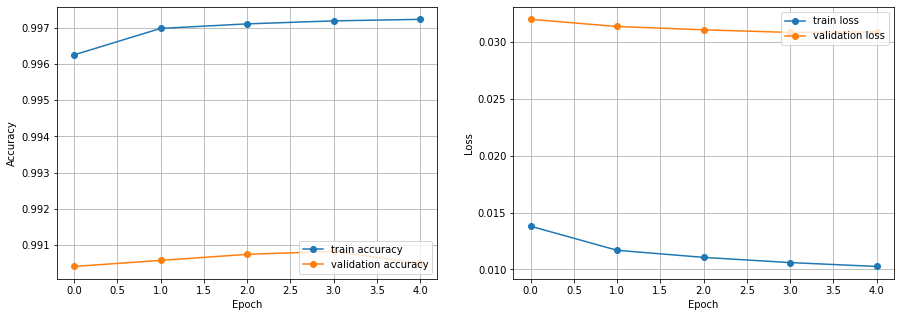

In [ ]:
###Plotting graph for loss function 'sgd'
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
###Predcting accrucy for 'sgd'
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 13s 42ms/step - loss: 0.0212 - accuracy: 0.9936

Test Accuracy: 0.9936000108718872

Test Loss: 0.02123219519853592


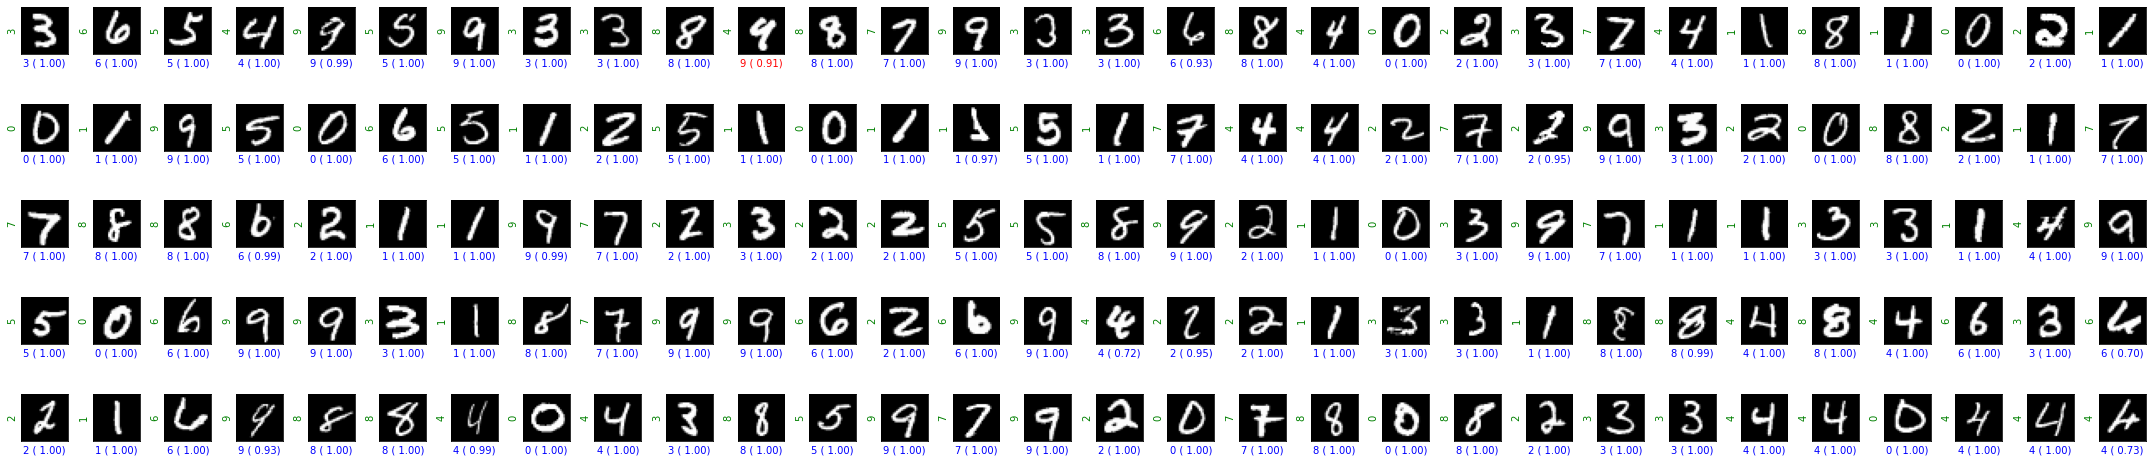

In [ ]:
###Predicting Images for loss function 'sgd'

ROWS = 5
COLS = 30

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [ ]:
###For loss function 'RMSProp'
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
h3 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=256, validation_split=0.2)

Epoch 1/5
188/188 [==============================] - 262s 1s/step - loss: 0.0371 - accuracy: 0.9894 - val_loss: 0.0574 - val_accuracy: 0.9849
Epoch 2/5
188/188 [==============================] - 260s 1s/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.0395 - val_accuracy: 0.9883
Epoch 3/5
188/188 [==============================] - 260s 1s/step - loss: 0.0170 - accuracy: 0.9943 - val_loss: 0.0404 - val_accuracy: 0.9900
Epoch 4/5
188/188 [==============================] - 259s 1s/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0375 - val_accuracy: 0.9903
Epoch 5/5
188/188 [==============================] - 259s 1s/step - loss: 0.0104 - accuracy: 0.9964 - val_loss: 0.0385 - val_accuracy: 0.9903


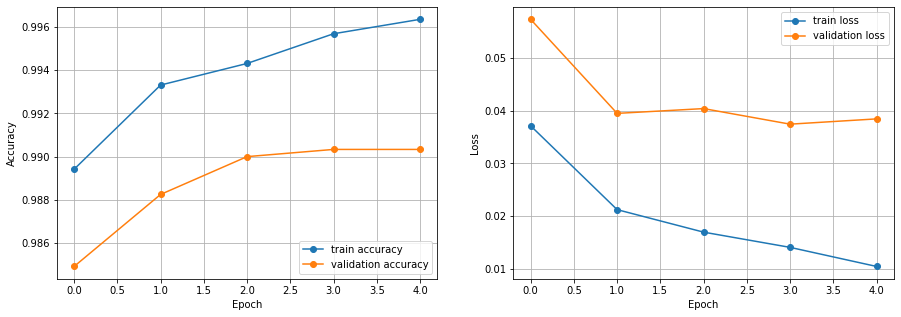

In [ ]:
###Plotting graph for loss function 'RMSProp'
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
###Predcting accrucy for 'RMSProp'
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 13s 41ms/step - loss: 0.0358 - accuracy: 0.9898

Test Accuracy: 0.989799976348877

Test Loss: 0.035842109471559525


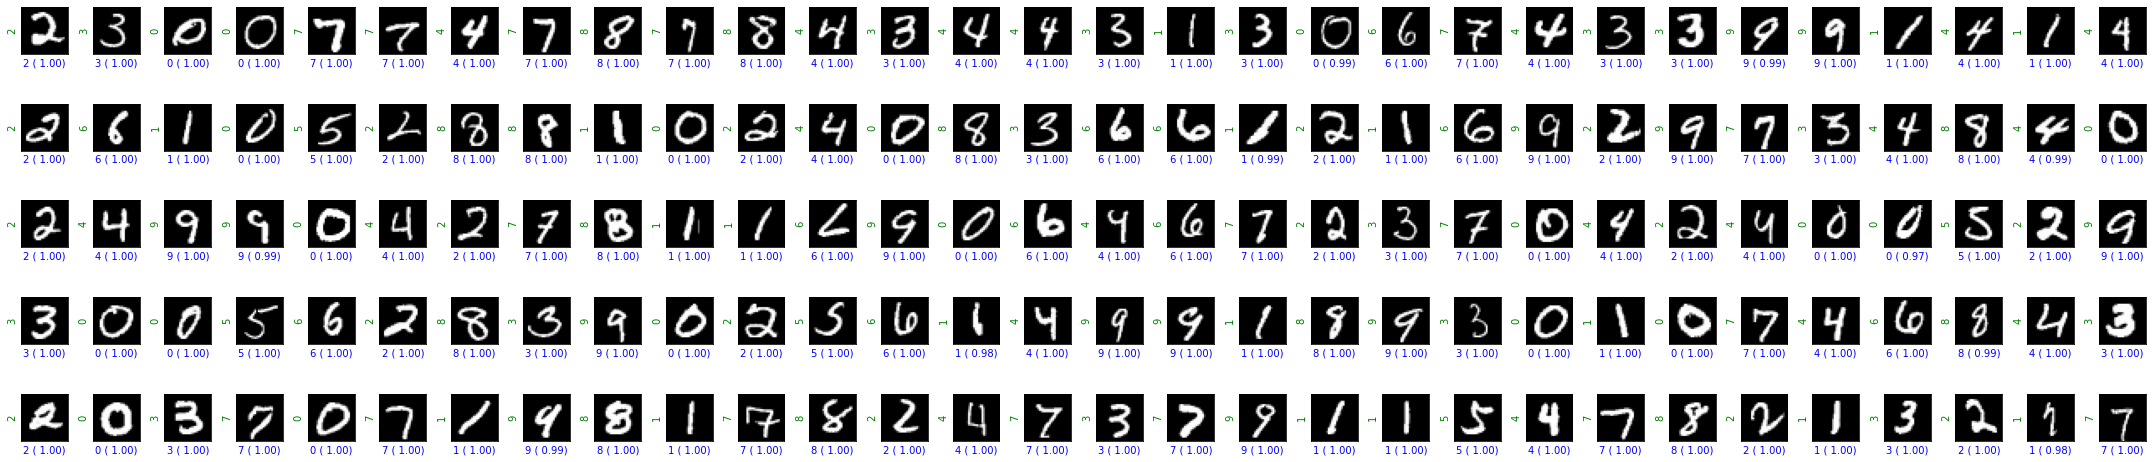

In [ ]:
###Predicting Images for loss function 'RMSProp'
ROWS = 5
COLS = 30

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()